<a href="https://colab.research.google.com/github/rajeshpahari/Deep-Learning/blob/main/Torch_Parameteric_Experiment_Multi_Variate_classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate classification - Parameteric Experiment

In [8]:
#Import Libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

from IPython import display
display.set_matplotlib_formats('svg')

In [9]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
#sns.pairplot(iris,hue='species')

In [11]:
#Organize data
data=torch.tensor(iris[iris.columns[0:4]].values).float()

#Transform Species to a number
labels=torch.zeros(len(data),dtype=torch.long)
labels[iris.species=='versicolor']=1
labels[iris.species=='virginica']=2
# labels
# labels.unique()



In [12]:
#iris.species.unique()

In [13]:
#########Create The ANN Model with n non of hidden layer
def CreateIris(nHidden):

  #Model Architechture
  ANNiris=nn.Sequential(
      nn.Linear(4,nHidden),
      nn.ReLU(),
      nn.Linear(nHidden,nHidden),
      nn.ReLU(),
      nn.Linear(nHidden,3)
      )

  #Lossfunction
  lossfunc=nn.CrossEntropyLoss()

  #Optimizer
  optimizer=torch.optim.SGD(ANNiris.parameters(),lr=.02)

  return ANNiris,lossfunc,optimizer





In [17]:
###################Train the Model
def trainIris(ANNiris):


  #numepochs=1000

  #initialize loss
  losses=torch.zeros(numepochs)
  ongoingACC=[]

  #Traning Loop

  for epochi in range(numepochs):

    yHat=ANNiris(data)

    #compute Loss
    loss=lossfunc(yHat,labels)
    losses[epochi]=loss

    #Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



  #Compute Accuracy
  matches=torch.argmax(yHat,axis=1)==labels
  matchMumeric=matches.float()
  accuracyPCT=100*torch.mean(matchMumeric)
  ongoingACC.append(accuracyPCT)


  #final forward pass
  pred=ANNiris(data)

  predlabels=torch.argmax(pred,axis=1)
  return 100*torch.mean((predlabels==labels).float())












In [19]:
from typing_extensions import Annotated
######################Run the Experiment

numepochs=150
numHidden=np.arange(1,129)
accuracies=[]

for nunits in numHidden:
  ANNiris,lossfunc,optimizer=CreateIris(nunits)

  #Run the Model
  acc=trainIris(ANNiris)
  accuracies.append(acc)

  



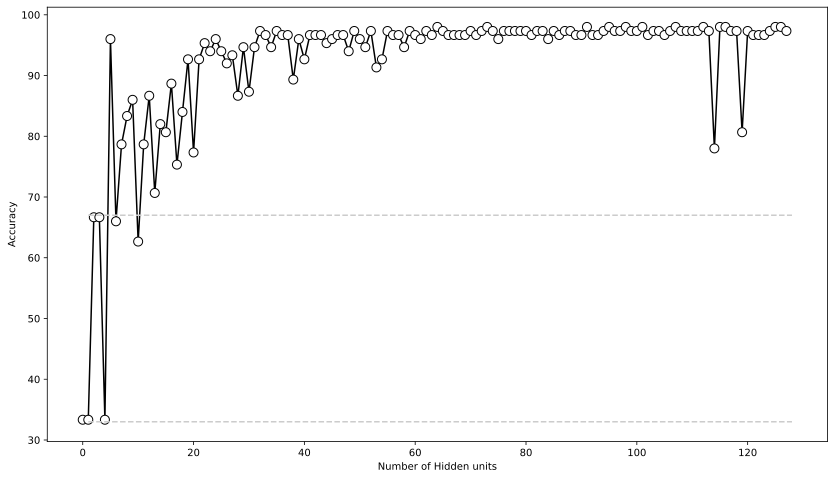

In [20]:
fig,ax=plt.subplots(1,figsize=(14,8))

ax.plot(accuracies,'ko-',markerfacecolor='w',markersize=9)
ax.plot(numHidden[[0,-1]],[33,33],'--',color=[.8,.8,.8])
ax.plot(numHidden[[0,-1]],[67,67],'--',color=[.8,.8,.8])
ax.set_xlabel('Number of Hidden units')
ax.set_ylabel('Accuracy')
plt.show()
